### Introduction to Data Science
## Homework 3: Due 5pm to My Mailbox (2nd Floor, 19 W 4th St) Wednesday April 19th

#### Student Name:  Chuan Long

#### Student Netid: cl4076

In this assignment we will be looking at data generated by particle physicists to test whether machine learning can help classify whether certain particle decay experiments identify the presence of a Higgs Boson. One does not need to know anything about particle physics to do well here, but if you are curious, full feature and data descriptions can be found here:

- https://www.kaggle.com/c/higgs-boson/data
- http://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

The goal of this assignment is to learn to use cross-validation for model selection. We’ll also use learning curve analysis to understand how well different algorithms make use of limited data. For more documentation on cross-validation with Python, you can consult the following:

- http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation


### Part 1: Data preparation
Create a data preparation and cleaning function that does the following:
- Has a single input that is a file name string
- Reads data (the data is comma separated, has a row header and the first column `EventID` is the index) into a pandas `dataframe`
- Cleans the data
  - Convert the feature `Label` to numeric (choose the minority class to be equal to 1)
    - Create a feature `Y` with numeric label
    - Drop the feature `Label`
  - If a feature has missing values (i.e., `-999`): 
    - Create a dummy variable for the missing value
      - Call the variable `orig_var_name` + `_mv` where `orig_var_name` is the name of the actual var with a missing value
      - Give this new variable a 1 if the original variable is missing
    - Replace the missing value with the average of the feature (make sure to compute the mean on records where the value isn't missing). You may find pandas' `.replace()` function useful.
- After the above is done, rescales the data so that each feature has zero mean and unit variance (hint: look up sklearn.preprocessing)
- Returns the cleaned and rescaled dataset

Hint: as a guide, this function can easily be done in less than 15 lines.

In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [25]:
infile_name = 'data/boson_training_cut_2000.csv'
df = pd.read_csv(infile_name, sep = ',', header = 0, index_col = 0)
for col in df.columns:
    if (df[col] == -999).any():
        new_col = str(col) + '_mv'
        df[new_col] = df[col].apply(lambda x : 1 if x == -999 else 0)
        col_mean = df[col].dropna().mean(axis = 0)
        df[col] = df[col].replace(-999, col_mean)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,Label,DER_mass_MMC_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv
EventId,,,,,,,,,,,,,,
100000,138.470000,51.655,97.827,27.980,0.910000,124.711000,2.666000,3.064,41.928,s,0,0,0,0
100001,160.937000,68.768,103.235,48.146,-715.467139,-615.259844,-716.344409,3.473,2.078,b,0,1,1,1
100002,-38.524409,162.172,125.953,35.635,-715.467139,-615.259844,-716.344409,3.148,9.336,b,1,1,1,1
100003,143.905000,81.417,80.943,0.414,-715.467139,-615.259844,-716.344409,3.310,0.414,b,0,1,1,1
100004,175.864000,16.915,134.805,16.405,-715.467139,-615.259844,-716.344409,3.891,16.405,b,0,1,1,1
100005,89.744000,13.550,59.149,116.344,2.636000,284.584000,-0.540000,1.362,61.619,b,0,0,0,0
100006,148.754000,28.862,107.782,106.130,0.733000,158.359000,0.113000,2.941,2.545,s,0,0,0,0
100007,154.916000,10.418,94.714,29.169,-715.467139,-615.259844,-716.344409,2.897,1.526,s,0,1,1,1
100008,105.594000,50.559,100.989,4.288,-715.467139,-615.259844,-716.344409,2.904,4.288,b,0,1,1,1


In [46]:
infile_name = 'data/boson_training_cut_2000.csv'
df = pd.read_csv(infile_name, sep = ',', header = 0, index_col = 0)
labels = df.Label.value_counts(ascending = False).index.tolist()
Y = df['Label'].apply(lambda x : labels.index(x))
df = df.drop('Label', 1)
for col in df.columns:
    if (df[col] == -999).any():
        new_col = str(col) + '_mv'
        df[new_col] = df[col].apply(lambda x : 1 if x == -999 else 0)
        col_mean = df[col].dropna().mean(axis = 0)
        df[col] = df[col].replace(-999, col_mean)
scaled_df = preprocessing.scale(df)
data_clean = pd.DataFrame(scaled_df, columns = df.columns, index = df.index)
data_clean = data_clean.assign(Y = Y.values)
data_clean.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_mass_MMC_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv,Y
count,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1999.000000
mean,-3.315674e-17,-1.710599e-16,1.834173e-17,5.020718e-17,-4.033236e-16,-2.874695e-16,-1.490665e-16,-6.431407e-17,2.282650e-17,1.146879e-16,-4.754132e-17,-4.754132e-17,-4.754132e-17,0.333167
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.471463
min,-1.852556e+00,-1.463197e+00,-1.870118e+00,-8.914087e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,-2.762886e+00,-9.067964e-01,-4.052653e-01,-1.591164e+00,-1.591164e+00,-1.591164e+00,0.000000
25%,-2.282273e-01,-8.395946e-01,-5.573124e-01,-7.073110e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,-6.717898e-01,-7.721390e-01,-4.052653e-01,-1.591164e+00,-1.591164e+00,-1.591164e+00,0.000000
50%,9.913407e-02,-7.199834e-02,-1.731902e-01,-3.106130e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,1.609937e-01,-2.713372e-01,-4.052653e-01,6.284708e-01,6.284708e-01,6.284708e-01,0.000000
75%,4.348493e-01,7.229055e-01,3.270757e-01,3.368307e-01,1.585199e+00,8.602086e-01,1.577605e+00,7.131370e-01,4.345566e-01,-4.052653e-01,6.284708e-01,6.284708e-01,6.284708e-01,1.000000
max,8.521411e+00,6.280756e+00,8.862150e+00,7.608615e+00,1.607632e+00,7.104658e+00,1.625369e+00,3.989448e+00,9.699160e+00,2.467519e+00,6.284708e-01,6.284708e-01,6.284708e-01,1.000000


In [3]:
X = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
X_scaled.mean(axis = 0)
X_scaled.std(axis = 0)

array([ 1.,  1.,  1.])

In [48]:
# Make sure what the professor asks for
def cleanBosonData(infile_name):
    # Read the data as dataframe object
    data = pd.read_csv(infile_name, sep = ',', header = 0, index_col = 0)
    # Count the type of data.Label
    labels = data.Label.value_counts(ascending = False).index.tolist()
    # Create Feature Y to be a Numeric Label
    Y = data['Label'].apply(lambda x : labels.index(x))
    # Drop the feature Label
    data = data.drop('Label', 1)
    # Create dummy feature and fill the missing value with the mean of original attribute
    for col in data.columns:
        if (data[col] == -999).any():
            new_col = str(col) + '_mv'
            data[new_col] = data[col].apply(lambda x : 1 if x == -999 else 0)
            col_mean = data[col].dropna().mean(axis = 0)
            data[col] = data[col].replace(-999, col_mean)
    # Standardize the data set
    data_scale = preprocessing.scale(data)
    # Transform the numpy array to dataframe object
    data_clean = pd.DataFrame(data_scale, columns = data.columns, index = data.index)
    # Add the numeric label value
    data_clean = data_clean.assign(Y = Y.values)
    return data_clean

In [52]:
file_path = 'data/boson_training_cut_2000.csv'
clean_data = cleanBosonData(file_path)
clean_data.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_mass_MMC_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv,Y
count,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1999.000000
mean,-3.315674e-17,-1.710599e-16,1.834173e-17,5.020718e-17,-4.033236e-16,-2.874695e-16,-1.490665e-16,-6.431407e-17,2.282650e-17,1.146879e-16,-4.754132e-17,-4.754132e-17,-4.754132e-17,0.333167
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.471463
min,-1.852556e+00,-1.463197e+00,-1.870118e+00,-8.914087e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,-2.762886e+00,-9.067964e-01,-4.052653e-01,-1.591164e+00,-1.591164e+00,-1.591164e+00,0.000000
25%,-2.282273e-01,-8.395946e-01,-5.573124e-01,-7.073110e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,-6.717898e-01,-7.721390e-01,-4.052653e-01,-1.591164e+00,-1.591164e+00,-1.591164e+00,0.000000
50%,9.913407e-02,-7.199834e-02,-1.731902e-01,-3.106130e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,1.609937e-01,-2.713372e-01,-4.052653e-01,6.284708e-01,6.284708e-01,6.284708e-01,0.000000
75%,4.348493e-01,7.229055e-01,3.270757e-01,3.368307e-01,1.585199e+00,8.602086e-01,1.577605e+00,7.131370e-01,4.345566e-01,-4.052653e-01,6.284708e-01,6.284708e-01,6.284708e-01,1.000000
max,8.521411e+00,6.280756e+00,8.862150e+00,7.608615e+00,1.607632e+00,7.104658e+00,1.625369e+00,3.989448e+00,9.699160e+00,2.467519e+00,6.284708e-01,6.284708e-01,6.284708e-01,1.000000


### Part 2: Basic evaluations
In this part you will build an out-of-the box logistic regression (LR) model and support vector machine (SVM). You will then plot ROC for the LR and SVM model.

1\. Clean the two data files included in this assignment (`data/boson_training_cut_2000.csv` and `data/boson_testing_cut.csv`) and use them as training and testing data sets.

In [62]:
data_train = cleanBosonData("data/boson_training_cut_2000.csv")
data_test = cleanBosonData("data/boson_testing_cut.csv")

2\. On the training set, build the following models:

- A logistic regression using sklearn's `linear_model.LogisticRegression()`. For this model, use `C=1e30`.
- An SVM using sklearn's `svm.svc()`. For this model, specify that `kernel="linear"`.

For each model above, plot the ROC curve of both models on the same plot. Make sure to use the test set for computing and plotting. In the legend, also print out the Area Under the ROC (AUC) for reference.

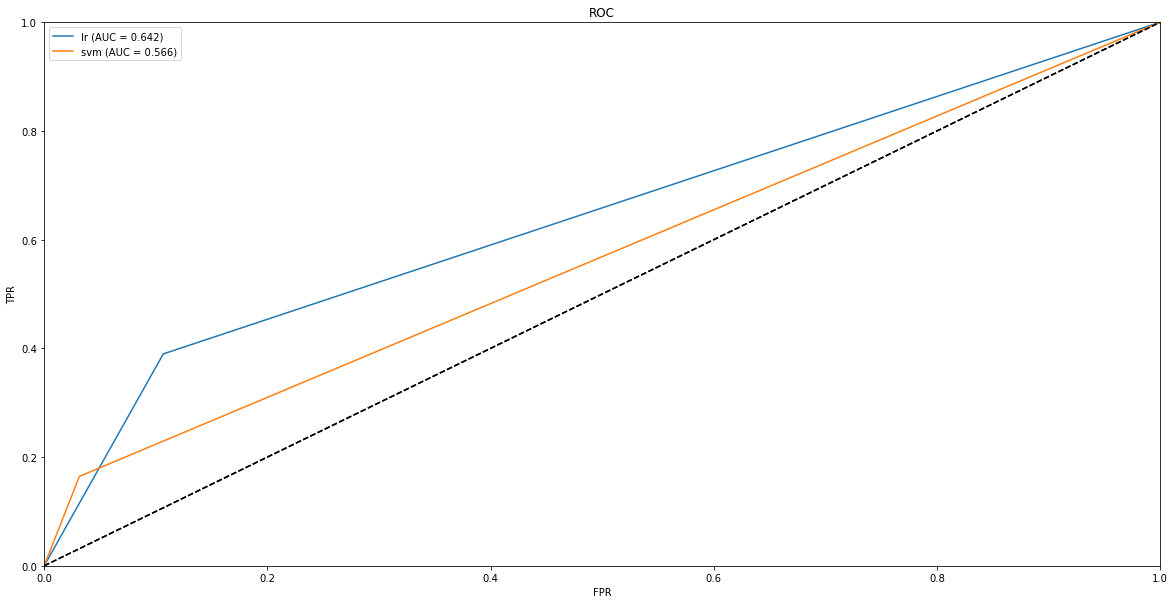

In [71]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
%matplotlib inline

lr = LogisticRegression(C = 1e30)
lr = lr.fit(data_train.drop('Y', 1), data_train.Y)
lr_preds = lr.predict(data_test.drop('Y', 1))

svm = SVC(kernel = 'linear')
svm = svm.fit(data_train.drop('Y', 1), data_train.Y)
svm_preds = svm.predict(data_test.drop('Y', 1))


def plotROC(label_string, truth, preds):
    fpr, tpr, thresholds = roc_curve(truth, preds)    
    roc_auc = auc(fpr, tpr)
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="best")

plt.figure(figsize = (20, 10))
plotROC('lr', data_test.Y, lr_preds)
plotROC('svm', data_test.Y, svm_preds)

3\. Which of the two models is generally better at ranking the test set? Are there any classification thresholds where the model identified above as "better" would underperform the other in a classification metric (such as TPR)?

* As we can see, the logisticRegression method is better than SVM method at ranking the test set, since that the AUC value of LR method is higher than the AUC value of SVM. 
* Yes, when the TPR value is less than approximately 0.15(threshold), the SVM method is better than LR method.

### Part 3: Model selection with cross-validation
We think we might be able to improve the performance of the SVM if we perform a grid search on the hyper-parameter $C$.  Because we only have 1000 instances, we will have to use cross-validation to find the optimal $C$.

1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), a sequence of values for $C$ (`cs`)
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Splits the data into `data_train` & `data_validate` according to cross-validation logic
  - Inner Loop: `for each c in cs`:
    - Trains an SVM on training split with `C=c, kernel="linear"`
    - Computes AUC_c_k on validation data
    - Stores AUC_c_k in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `c:[auc-c1,auc-c2,..auc-ck]`

In [64]:
def xValSVM(dataset, label_name, k, cs):
    aucs = collections.defaultdict(list)
    for i in range(2, k):
        for c in cs:
            kf = KFold(n = dataset.shape[0], n_folds = i)
            roc_auc = 0
            for train_index, validate_index in kf:
                data_train = dataset.iloc[train_index]
                data_validate = dataset.iloc[validate_index]
                svm = SVC(C = c, kernel = 'linear')
                svm = svm.fit(data_train.drop(label_name, 1), data_train[label_name])
                svm_preds = svm.predict(data_validate.drop(label_name, 1))
                fpr, tpr, thresholds = roc_curve(data_validate[label_name], svm_preds)   
                roc_auc += auc(fpr, tpr)
            aucs[c] += [roc_auc / i]
    return aucs

2\. Using the function written above, do the following:
- Generate a sequence of 10 $C$ values in the interval `[10^(-8), ..., 10^1]` (i.e., do all powers of 10 from -8 to 1).
2.	Call aucs = xValSVM(train, ‘Y’, 10, cs)
3.	For each c in cs, get mean(AUC) and StdErr(AUC) 
4.	Compute the value for max(meanAUC-StdErr(AUC)) across all values of c.
5.	Generate a plot with the following:
a.	Log10(c) on the x-axis
b.	1 series with mean(AUC) for each c
c.	1 series with mean(AUC)-stderr(AUC) for each c (use ‘k+’ as color pattern)
d.	1 series with mean(AUC)+stderr(AUC) for each c (use ‘k--‘ as color pattern)
e.	a reference line for max(AUC-StdErr(AUC)) (use ‘r’ as color pattern)

Then answer the question: Did the model parameters selected beat the out-of-the-box model for SVM? 

In [73]:
from sklearn.cross_validation import KFold
cs = [10 ** i for i in range(-8, 2)]
aucs = xValSVM(data_train, 'Y', 10, cs)
data_train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_mass_MMC_mv,DER_deltaeta_jet_jet_mv,DER_mass_jet_jet_mv,DER_prodeta_jet_jet_mv,Y
count,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1999.000000
mean,-3.315674e-17,-1.710599e-16,1.834173e-17,5.020718e-17,-4.033236e-16,-2.874695e-16,-1.490665e-16,-6.431407e-17,2.282650e-17,1.146879e-16,-4.754132e-17,-4.754132e-17,-4.754132e-17,0.333167
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.471463
min,-1.852556e+00,-1.463197e+00,-1.870118e+00,-8.914087e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,-2.762886e+00,-9.067964e-01,-4.052653e-01,-1.591164e+00,-1.591164e+00,-1.591164e+00,0.000000
25%,-2.282273e-01,-8.395946e-01,-5.573124e-01,-7.073110e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,-6.717898e-01,-7.721390e-01,-4.052653e-01,-1.591164e+00,-1.591164e+00,-1.591164e+00,0.000000
50%,9.913407e-02,-7.199834e-02,-1.731902e-01,-3.106130e-01,-6.284684e-01,-5.696512e-01,-6.284610e-01,1.609937e-01,-2.713372e-01,-4.052653e-01,6.284708e-01,6.284708e-01,6.284708e-01,0.000000
75%,4.348493e-01,7.229055e-01,3.270757e-01,3.368307e-01,1.585199e+00,8.602086e-01,1.577605e+00,7.131370e-01,4.345566e-01,-4.052653e-01,6.284708e-01,6.284708e-01,6.284708e-01,1.000000
max,8.521411e+00,6.280756e+00,8.862150e+00,7.608615e+00,1.607632e+00,7.104658e+00,1.625369e+00,3.989448e+00,9.699160e+00,2.467519e+00,6.284708e-01,6.284708e-01,6.284708e-01,1.000000


In [74]:
auc_df = pd.DataFrame.from_dict(aucs)
auc_df

,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1,1.0,10.0
0,0.5,0.5,0.5,0.5,0.5,0.5,0.522373,0.559606,0.575060,0.581480
1,0.5,0.5,0.5,0.5,0.5,0.5,0.523884,0.551305,0.559604,0.559187
2,0.5,0.5,0.5,0.5,0.5,0.5,0.532280,0.553646,0.558340,0.560771
3,0.5,0.5,0.5,0.5,0.5,0.5,0.531855,0.552411,0.558549,0.559970
4,0.5,0.5,0.5,0.5,0.5,0.5,0.534303,0.553205,0.555693,0.557289
5,0.5,0.5,0.5,0.5,0.5,0.5,0.532722,0.550390,0.554491,0.554578
6,0.5,0.5,0.5,0.5,0.5,0.5,0.532682,0.551441,0.553328,0.552974
7,0.5,0.5,0.5,0.5,0.5,0.5,0.535177,0.553265,0.559735,0.560042


In [67]:
max_diff = max(auc_df.describe().loc['mean'] - auc_df.describe().loc['std'])
max_diff

0.55256824161690166

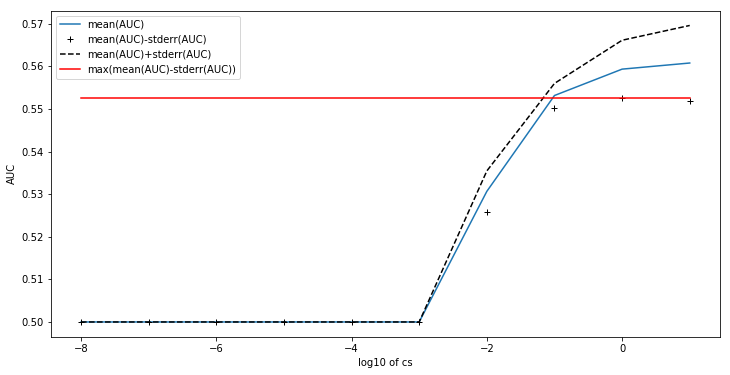

In [68]:
x = np.log10(cs)
plt.figure(figsize = (12, 6))
# 1 series with mean(AUC) for each c
plt.plot(x, auc_df.describe().loc['mean'], label = 'mean(AUC)')
# 1 series with mean(AUC)-stderr(AUC) for each c (use ‘k+’ as color pattern)
plt.plot(x, auc_df.describe().loc['mean'] - auc_df.describe().loc['std'], 'k+', label = 'mean(AUC)-stderr(AUC)')
# 1 series with mean(AUC)+stderr(AUC) for each c (use ‘k--‘ as color pattern)
plt.plot(x, auc_df.describe().loc['mean'] + auc_df.describe().loc['std'], 'k--', label = 'mean(AUC)+stderr(AUC)')
# a reference line for max(AUC-StdErr(AUC)) (use ‘r’ as color pattern)
plt.plot(x, [max_diff] * x.shape[0], 'r', label = 'max(mean(AUC)-stderr(AUC))')
plt.legend(loc = 'best')
plt.xlabel('log10 of cs')
plt.ylabel('AUC')

answer here: Yes. Because the highest AUC is approximately 0.63 when c = 10 and kfolds = 3(Note that the index 0 in the statistic dataframe represents kfolds = 2). And the AUC value of out-of-box model that we have trained before is 0.56.

3\. Which of the two algorithms are more suitable for smaller sample sizes, given the set of features? If it costs twice the investment to run enough experiments to double the data, do you think it is a worthy investment?


answer here:

4\. Is there a reason why cross-validation might be biased? If so, in what direction is it biased? (Hint: refer to ESL figure 7.8)?



answer here: